In [0]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddheshgadge","key":"d3c31fe0f0f1cf0fc9bbdbd5d4077963"}'}

In [0]:
!mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d zalando-research/fashionmnist

 83% 57.0M/68.8M [00:01<00:00, 43.6MB/s]
100% 68.8M/68.8M [00:01<00:00, 64.6MB/s]


In [7]:
!unzip /content/fashionmnist.zip

Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df = pd.read_csv('/content/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/fashion-mnist_test.csv')

In [10]:
df.shape,df_test.shape

((60000, 785), (10000, 785))

In [11]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
x = df.iloc[:,1:].values
y = df.iloc[:,1].values
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,1].values

In [13]:
x = x/255
x_test = x_test/255
x.shape,y.shape,x_test.shape,y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [0]:
def print_img(img):
  img = img.reshape(28,28)
  plt.imshow(img)

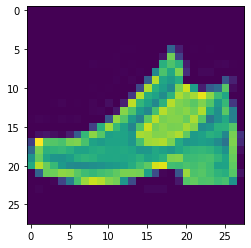

In [15]:
print_img(x[1])

In [0]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
y = one.fit_transform(y.reshape(-1,1)).toarray()
y_test = one.transform(y_test.reshape(-1,1)).toarray()

##Artificial Neural Network

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [0]:
model = Sequential()

###Layer 1

In [0]:
model.add(Dense(units=784,activation='relu',input_shape=(784,)))

###Layer2

In [0]:
model.add(Dense(units=256,activation='relu'))

###Layer 3

In [0]:
model.add(Dense(units=8,activation='softmax'))

#Compilation and Summary

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 2056      
Total params: 818,456
Trainable params: 818,456
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x,y,batch_size=64,epochs=20,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 96us/step - loss: 0.0186 - accuracy: 0.9984 - val_loss: 0.0060 - val_accuracy: 0.9998
Epoch 2/20
48000/48000 [==============================] - 3s 61us/step - loss: 0.0068 - accuracy: 0.9998 - val_loss: 0.0072 - val_accuracy: 0.9998
Epoch 3/20
48000/48000 [==============================] - 3s 63us/step - loss: 0.0062 - accuracy: 0.9998 - val_loss: 0.0044 - val_accuracy: 0.9998
Epoch 4/20
48000/48000 [==============================] - 3s 64us/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 0.0043 - val_accuracy: 0.9998
Epoch 5/20
48000/48000 [==============================] - 3s 63us/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 0.0036 - val_accuracy: 0.9998
Epoch 6/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 0.9998
Epoch 7/20
48000/48000 [==============================] - 3s 61us/st

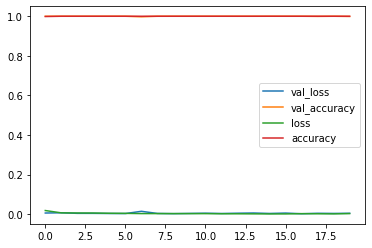

In [25]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [26]:
model.evaluate(x,y)

60000/60000 [==============================] - 3s 50us/step


[0.004165452373883509, 0.9988499879837036]

In [0]:
y_pred = model.predict(x_test)

In [0]:
# y_pred = np.reshape(y_pred, (1,np.product(y_pred.shape)))
# y_pred[0]
y_pred = np.round(y_pred)

In [30]:
# y_pred_array = np.array(y_pred_array,dtype="int")
y_pred.shape

(10000, 8)

In [0]:
y_test[10:15]

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])